<a href="https://colab.research.google.com/github/Owaiskhan9654/word2vec/blob/master/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this code I am using Word2vec pretrained model provided by Google 

In [56]:
import numpy as np
from sklearn.manifold import TSNE # This library is used for reducing the dimensions of our vector . bacically I will be using techniques of PCA components
import matplotlib.pyplot as plt

In [3]:
import gensim.downloader as api #Pre_trained word2vec model used for word embedding provided by Gensim API
word2vec_model = api.load('word2vec-google-news-300') # this model will be downloaded

[==================================================] 100.0% 1662.8/1662.8MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Each word in word2vec model contains some associated vectors which they got from training their model

In [35]:
word2vec_model['huge'] #vectors associated with the word 'huge'

array([ 0.1875    ,  0.11767578, -0.05517578,  0.19433594, -0.01953125,
       -0.3359375 , -0.00086594, -0.328125  ,  0.01098633,  0.16308594,
        0.0859375 , -0.12988281,  0.06738281, -0.09667969, -0.12402344,
       -0.05493164,  0.07714844,  0.07177734, -0.24121094,  0.08203125,
        0.02502441,  0.03271484,  0.08886719,  0.11572266,  0.02624512,
       -0.23242188, -0.35546875,  0.01275635,  0.06396484, -0.10546875,
       -0.13378906,  0.11865234,  0.18164062,  0.08544922,  0.00512695,
       -0.13769531,  0.00312805,  0.16894531,  0.28515625,  0.28125   ,
        0.13671875, -0.10839844,  0.24414062, -0.16210938, -0.04467773,
       -0.04345703,  0.03295898, -0.01171875, -0.06933594, -0.234375  ,
        0.05029297,  0.15820312, -0.10839844, -0.11230469, -0.22460938,
       -0.11865234,  0.03735352, -0.07910156,  0.33789062, -0.28125   ,
       -0.26171875,  0.31054688, -0.00588989, -0.05297852,  0.11035156,
       -0.0144043 ,  0.08300781,  0.08056641, -0.18359375,  0.03

In [37]:
word2vec_model.most_similar('dog') # This function provided by gensim will give top 10 words which are very similar to it

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dogs', 0.8680489659309387),
 ('puppy', 0.8106428384780884),
 ('pit_bull', 0.780396044254303),
 ('pooch', 0.7627377510070801),
 ('cat', 0.7609456777572632),
 ('golden_retriever', 0.7500902414321899),
 ('German_shepherd', 0.7465174198150635),
 ('Rottweiler', 0.7437614798545837),
 ('beagle', 0.7418621778488159),
 ('pup', 0.740691065788269)]

# good - off + on = bad
We can subtract the vectors of 'OFF' from the sum of vectors of 'GOOD' and 'ON' and we will be getting the following result

In [34]:
word2vec_model.most_similar(positive=['on','good'],negative=['off'] ,topn=1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('bad', 0.48413169384002686)]

In [48]:
vocablory = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]
# I am taking this vocablory in order to differentiate the Humans (of both genders) with fruits.word2vec model understand the meaning of gender.

def tsne_plot(model,vocablory):
    labels = []
    wordvecs = []

    for word in vocablory:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=6, n_components=2, init='pca', random_state=42) #Lower the perplexity the closer the points will be on the plot
    
    #This TSNE function is just a method of Dimensionality reduction to 2 components so that we can plot on 2d plane
    
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10,10)) # This denotes the size of the figure i.e 10 X 10
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],    # The text is placed at corresponding each point.
                     xy=(x[i], y[i]),
                     xytext=(5, 5),# The distance between point and corresponding text
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


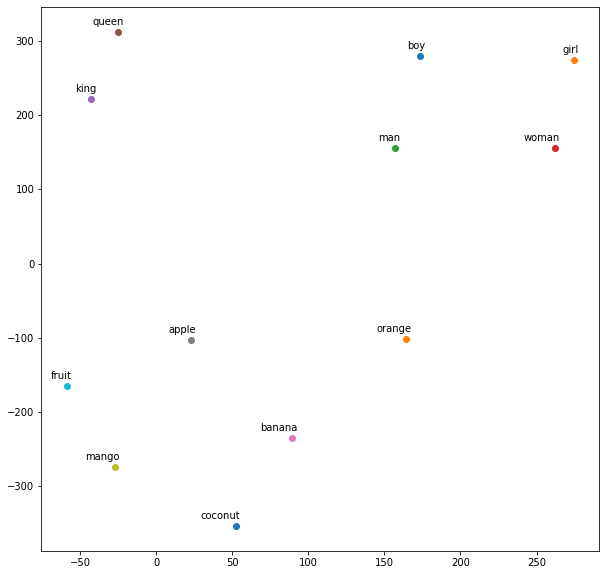

In [49]:
tsne_plot(word2vec_model,vocablory)